In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
total = pd.read_csv('Feature_Target_Data.csv')
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017]
years2 = [2011, 2012, 2013, 2014]
total = total.loc[total['Year'].isin(years)]
total2 = total.loc[total['Year'].isin(years2)]
major_regions = ['Houston', 'San Antonio', 'Austin', 'Richardson', 'Fort Worth']
color_dict = dict({'Houston':'blue',
                  'San Antonio':'orange',
                  'Austin': 'green',
                  'Richardson': 'red',
                   'Fort Worth': 'purple'})

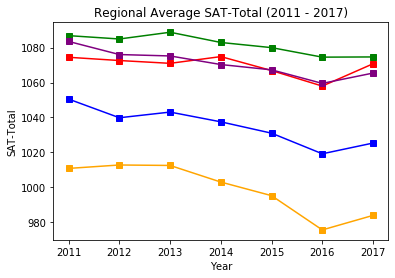

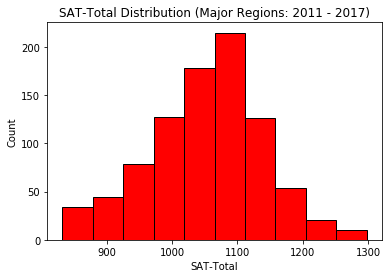

In [4]:
### SAT Regional Breakdown By Year/Region & Histogram 2011 - 2017 ###

for region in major_regions:
    region_total = total.loc[total['RegnName'] == region]
    sat_trend = pd.pivot_table(region_total, index='Year', values='SAT-Total', aggfunc=np.mean)
    sat_trend = pd.DataFrame(sat_trend.to_records())
    plt.plot(sat_trend['Year'], sat_trend['SAT-Total'], color=color_dict[region], marker='s', label=region)
plt.xlabel('Year')
plt.ylabel('SAT-Total')
plt.title('Regional Average SAT-Total (2011 - 2017)')
plt.show()

plt.hist(total['SAT-Total'], color='red', edgecolor='black')
plt.title('SAT-Total Distribution (Major Regions: 2011 - 2017)')
plt.xlabel('SAT-Total')
plt.ylabel('Count')
plt.show()


In [5]:
### District Mean for All Regions ###
print('District-Level SAT-Total Mean:', np.mean(total['SAT-Total']))
print('District-Level ACT-Composite Mean:', np.mean(total['ACT-Composite']))
print('District-Level AP-Passed (%) Mean:', np.mean(total['AP-Passed(%)']))
print('District-Level Wealth/ADA Mean:', np.mean(total['Wealth/ADA']))

District-Level SAT-Total Mean: 1052.814398200225
District-Level ACT-Composite Mean: 21.130933633295832
District-Level AP-Passed (%) Mean: 45.138357705286836
District-Level Wealth/ADA Mean: 431717.5905511811


Pearson Coefficient: 0.7367487715107958


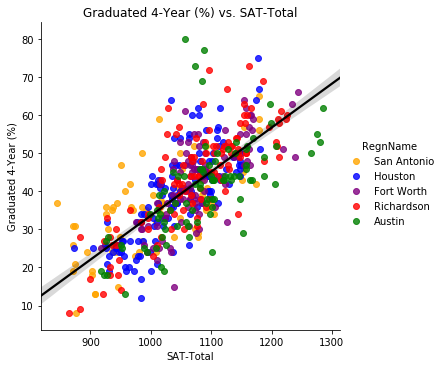

Pearson Coefficient: 0.7274368957434699


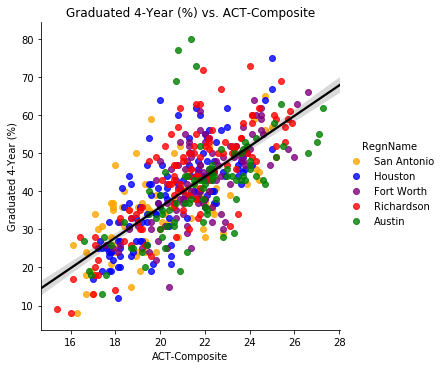

In [6]:
### SAT and ACT correlation with College Graduation % (classes of 2011 - 2014) ###
for test in ['SAT-Total', 'ACT-Composite']:
    graph = sns.lmplot(x=test, y='Graduated 4-Year (%)', hue='RegnName', palette=color_dict, data=total2, fit_reg=False)
    sns.regplot(x=test, y='Graduated 4-Year (%)', data=total2, scatter=False, ax=graph.axes[0, 0], line_kws={"color":"black"})
    if test == 'ACT-Composite':
        plt.title('Graduated 4-Year (%) vs. ACT-Composite')
        plt.xlabel('ACT-Composite')
    else:
        plt.title('Graduated 4-Year (%) vs. SAT-Total')
        plt.xlabel('SAT-Total')
    print('Pearson Coefficient:', np.corrcoef(total2[test], total2['Graduated 4-Year (%)'])[0][1])
    plt.show()

In [7]:
### SAT/ACT Participation Percentages 2011 - 2017 ###

participation = pd.pivot_table(total, columns='Year', values=['SAT-Part_Rate', 'ACT-Part_Rate'], aggfunc=np.mean)
participation

Year,2011,2012,2013,2014,2015,2016,2017
ACT-Part_Rate,32.007874,32.937008,32.346457,33.771654,35.204724,37.826772,37.409449
SAT-Part_Rate,61.866142,57.771654,56.511811,58.559055,59.039370,59.755906,62.267717


Pearson Coefficient: 0.4834977142751102


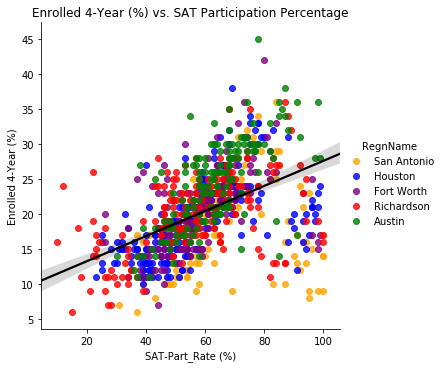

Pearson Coefficient: 0.5221000287977191


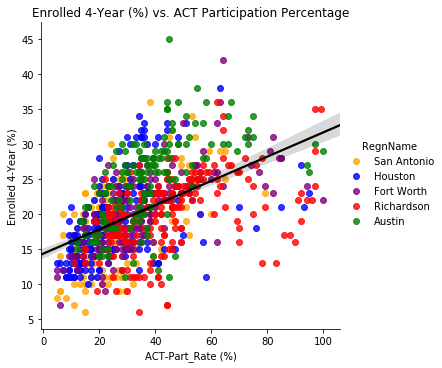

In [8]:
### SAT/ACT Participation Effect on College Enrollment Percentage ###
for participation in ['SAT-Part_Rate', 'ACT-Part_Rate']:
    graph = sns.lmplot(x=participation, y='Enrolled 4-Year (%)', hue='RegnName', palette=color_dict, data=total, fit_reg=False)
    sns.regplot(x=participation, y='Enrolled 4-Year (%)', data=total, scatter=False, ax=graph.axes[0, 0], line_kws={"color":"black"})
    if participation == 'ACT-Part_Rate':
        plt.title('Enrolled 4-Year (%) vs. ACT Participation Percentage')
        plt.xlabel('ACT-Part_Rate (%)')
    else:
        plt.title('Enrolled 4-Year (%) vs. SAT Participation Percentage')
        plt.xlabel('SAT-Part_Rate (%)')
    print('Pearson Coefficient:', np.corrcoef(total[participation], total['Enrolled 4-Year (%)'])[0][1])
    plt.show()

In [9]:
### AP Exams Taken Per Student Breakdown By Year/Region ###

exam_student = pd.pivot_table(total, columns='Year', index='RegnName', values=['AP-Exams Taken Per Student'], aggfunc=np.mean)
exam_student

AP-Exams Taken Per Student                                \
Year                              2011      2012      2013      2014   
RegnName                                                               
Austin                        2.043478  1.990909  2.050000  2.081818   
Fort Worth                    2.065385  2.034615  2.038462  2.084615   
Houston                       2.065625  2.009375  2.043750  2.050000   
Richardson                    2.035714  2.082143  2.128571  2.142857   
San Antonio                   1.811111  1.794737  1.831579  1.842105   

                                           
Year             2015      2016      2017  
RegnName                                   
Austin       2.200000  2.240909  2.271429  
Fort Worth   2.161538  2.226923  2.238462  
Houston      2.103125  2.178125  2.228125  
Richardson   2.264286  2.242857  2.307143  
San Antonio  2.005263  1.968421  2.105000

Pearson Coefficient: 0.6805971633287412


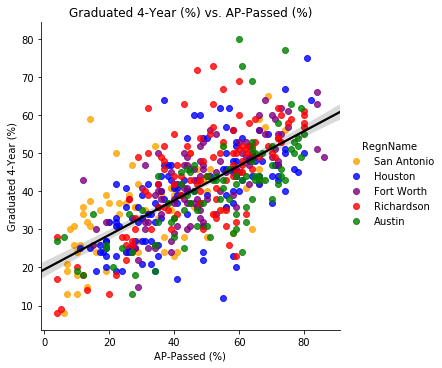

Pearson Coefficient: 0.30496592575598064


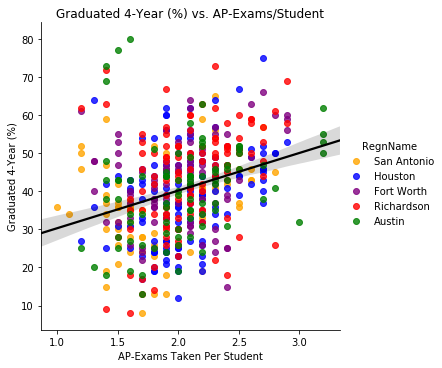

In [10]:
### AP Passing Percentage and AP Exams/Student Effect on College Graduation % ###
for test in ['AP-Passed(%)', 'AP-Exams Taken Per Student']:
    graph = sns.lmplot(x=test, y='Graduated 4-Year (%)', hue='RegnName', palette=color_dict, data=total2, fit_reg=False)
    sns.regplot(x=test, y='Graduated 4-Year (%)', data=total2, scatter=False, ax=graph.axes[0, 0], line_kws={"color":"black"})
    if test == 'AP-Exams Taken Per Student':
        plt.title('Graduated 4-Year (%) vs. AP-Exams/Student')
        plt.xlabel('AP-Exams Taken Per Student')
    else:
        plt.title('Graduated 4-Year (%) vs. AP-Passed (%)')
        plt.xlabel('AP-Passed (%)')
    print('Pearson Coefficient:', np.corrcoef(total2[test], total2['Graduated 4-Year (%)'])[0][1])
    plt.show()

Pearson Coefficient: 0.4828499727249076


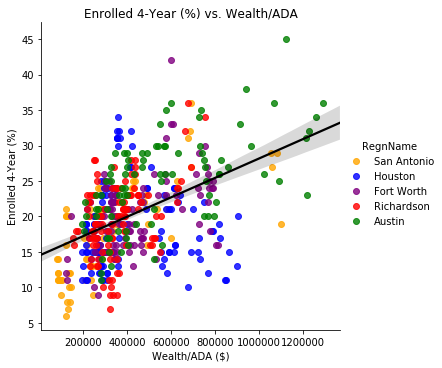

Pearson Coefficient: 0.35618588984136307


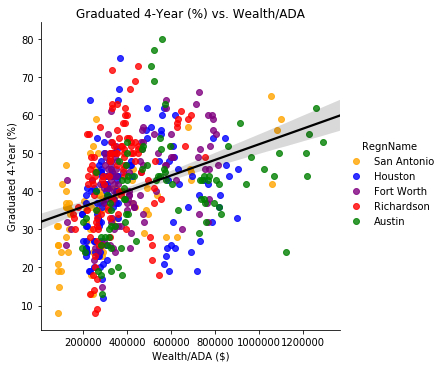

In [11]:
### Wealth/ADA effect on College Enrollment / College Graduation ###
for percent in ['Enrolled 4-Year (%)', 'Graduated 4-Year (%)']:
    graph = sns.lmplot(x='Wealth/ADA', y=percent, hue='RegnName', palette=color_dict, data=total2, fit_reg=False)
    sns.regplot(x='Wealth/ADA', y=percent, data=total2, scatter=False, ax=graph.axes[0, 0], line_kws={"color":"black"})
    if percent == 'Enrolled 4-Year (%)':
        plt.title('Enrolled 4-Year (%) vs. Wealth/ADA')
        plt.xlabel('Wealth/ADA ($)')
    else:
        plt.title('Graduated 4-Year (%) vs. Wealth/ADA')
        plt.xlabel('Wealth/ADA ($)')
    print('Pearson Coefficient:', np.corrcoef(total2['Wealth/ADA'], total2[percent])[0][1])
    plt.show()

In [12]:
### College Graduation By Region for High School Class of 2011 - 2014 ###
grad_by_region = pd.pivot_table(total2, index='RegnName', values=['Graduated 4-Year (%)'], aggfunc=np.mean)
grad_by_region.sort_values('Graduated 4-Year (%)', ascending=False)

,Graduated 4-Year (%)
RegnName,
Richardson,43.660714
Fort Worth,42.404303
Austin,40.617418
Houston,38.937500
San Antonio,35.245899


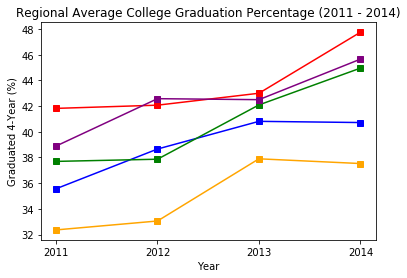

In [13]:
for region in major_regions:
    region_total = total2.loc[total['RegnName'] == region]
    sat_trend = pd.pivot_table(region_total, index='Year', values='Graduated 4-Year (%)', aggfunc=np.mean)
    sat_trend = pd.DataFrame(sat_trend.to_records())
    plt.plot(sat_trend['Year'], sat_trend['Graduated 4-Year (%)'], color=color_dict[region], marker='s', label=region)
plt.xlabel('Year')
plt.ylabel('Graduated 4-Year (%)')
plt.title('Regional Average College Graduation Percentage (2011 - 2014)')
plt.xticks([2011, 2012, 2013, 2014])
plt.show()

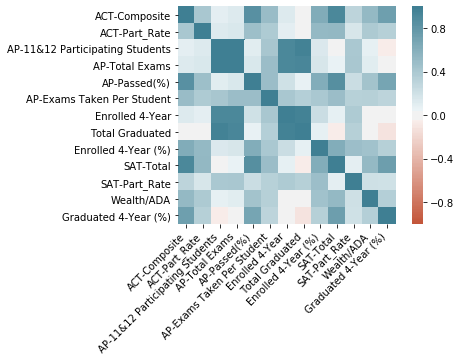

In [16]:
### Exploring Correlations / Mulicollinearity (Correlation Heatmap) ###
total = total.drop('Year', axis=1)
corr = total.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200), square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()